In [1]:
import jax
import jax.numpy as jnp
from consensus import *

In [2]:
key = jax.random.PRNGKey(0)
config = ConsensusConfig()

In [3]:
key, subkey = jax.random.split(key)

adj_mat = generate_random_adjacency_matrix(subkey, config)

key, subkey = jax.random.split(key)


initial_state = generate_random_agent_states(subkey, config)

In [4]:
jnp.linalg.norm(adj_mat, axis=1, keepdims=True, )

Array([[1.4142135],
       [1.4142135],
       [1.7320508],
       [1.7320508],
       [1.7320508]], dtype=float32)

In [5]:
initial_state

Array([[-0.79141927, -0.31202483, -0.73786545,  0.6202612 , -0.6111777 ],
       [ 0.27104306,  0.65300965, -0.09737301, -0.7656326 ,  0.05701613],
       [-0.9213977 , -0.69550824,  0.69740653, -0.00249243,  0.01338029],
       ...,
       [ 0.934633  , -0.4459145 ,  0.7428684 , -0.5317199 ,  0.9887655 ],
       [ 0.5390346 , -0.48631144,  0.1265409 , -0.08987975, -0.11147618],
       [-0.900332  , -0.08470678,  0.72673416, -0.75884247,  0.8060036 ]],      dtype=float32)

In [6]:
out = run_consensus_sim(adj_mat, initial_state, config)

In [7]:
outputs = []
from tqdm import tqdm

for i in tqdm(range(config.num_sims)):
    key, subkey = jax.random.split(key)

    adj_mat = generate_random_adjacency_matrix(subkey, config)

    key, subkey = jax.random.split(key)

    initial_state = generate_random_agent_states(subkey, config)

    trajectories = run_consensus_sim(adj_mat, initial_state, config)

    outputs.append(trajectories)



100%|██████████| 500/500 [00:01<00:00, 359.94it/s]


In [8]:
len(outputs)

500

In [9]:
x = outputs[1]

In [10]:
x

Array([[[-1.66636720e-01,  5.12272954e-01, -7.18595386e-01,
         -6.62203312e-01,  5.40143251e-01],
        [-1.74384415e-01,  4.56314355e-01, -6.64573908e-01,
         -6.39672816e-01,  5.08012652e-01],
        [-1.80595487e-01,  4.05365229e-01, -6.15751922e-01,
         -6.18524671e-01,  4.76983011e-01],
        ...,
        [-1.59010112e-01, -1.50679022e-01, -1.53786018e-01,
         -1.67208239e-01, -1.54014796e-01],
        [-1.58967257e-01, -1.50819257e-01, -1.53847516e-01,
         -1.66839033e-01, -1.54245734e-01],
        [-1.58922747e-01, -1.50957853e-01, -1.53907120e-01,
         -1.66481182e-01, -1.54461235e-01]],

       [[-2.95487672e-01,  2.00281173e-01,  7.41982460e-01,
         -6.08857512e-01, -5.24303138e-01],
        [-2.84227967e-01,  2.24914923e-01,  6.94133639e-01,
         -5.94611228e-01, -5.13903916e-01],
        [-2.74258196e-01,  2.46254981e-01,  6.50272310e-01,
         -5.80505908e-01, -5.03451347e-01],
        ...,
        [-9.05691609e-02,  2.4682218

In [11]:
x.shape

(500, 100, 5)

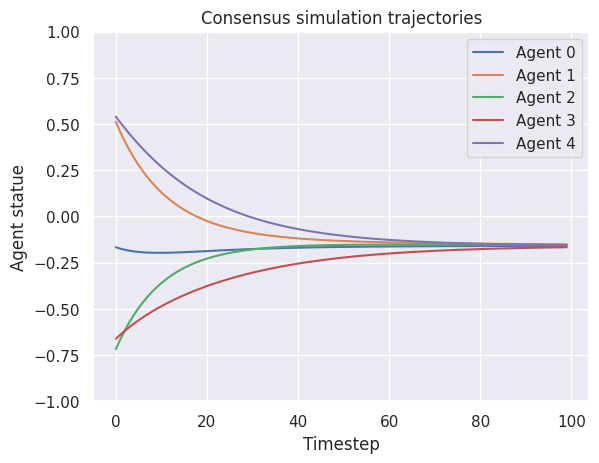

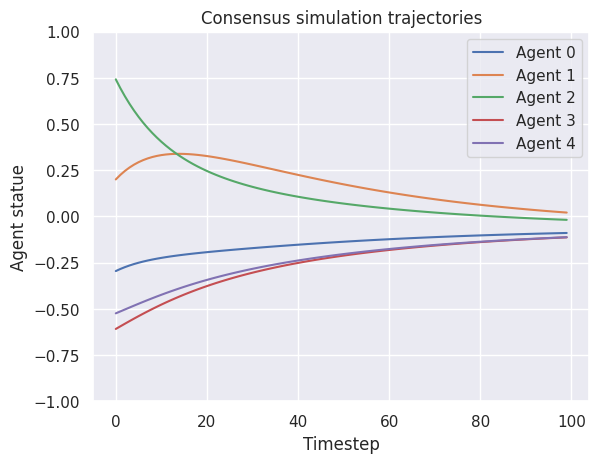

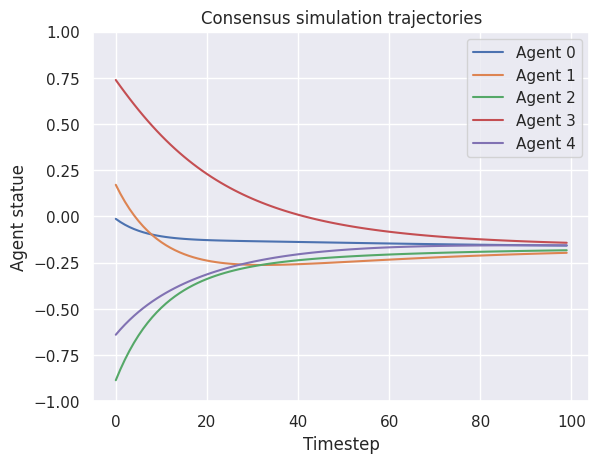

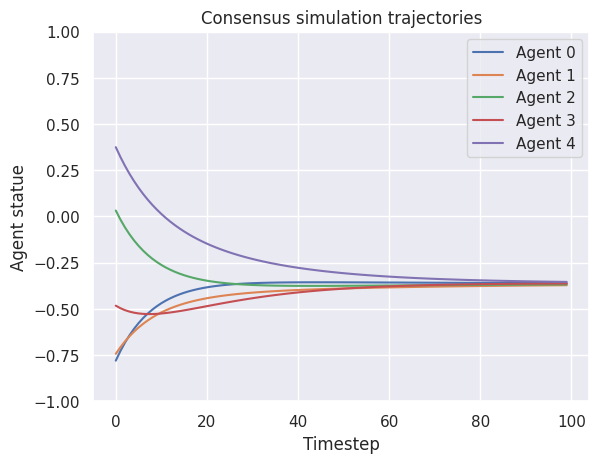

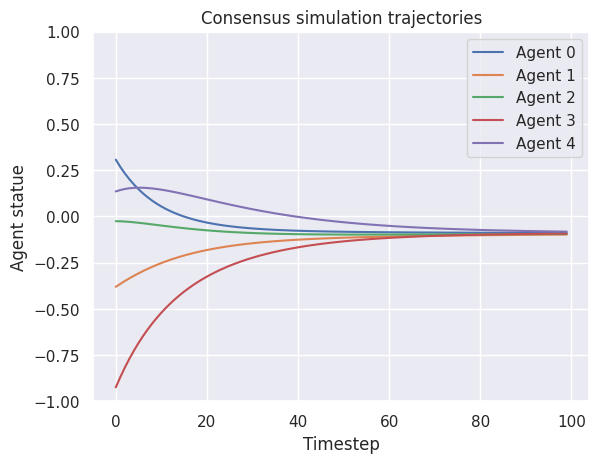

In [12]:
for i in range(5):
    plot_consensus(x[i], config)

In [13]:
s = initial_state[0]
s

Array([ 0.88282514,  0.4825251 , -0.07153511,  0.03161097,  0.97659564],      dtype=float32)

In [14]:
s[jnp.newaxis, :] - s[:, jnp.newaxis]

Array([[ 0.        , -0.40030003, -0.95436025, -0.8512142 ,  0.0937705 ],
       [ 0.40030003,  0.        , -0.5540602 , -0.45091414,  0.49407053],
       [ 0.95436025,  0.5540602 ,  0.        ,  0.10314608,  1.0481308 ],
       [ 0.8512142 ,  0.45091414, -0.10314608,  0.        ,  0.9449847 ],
       [-0.0937705 , -0.49407053, -1.0481308 , -0.9449847 ,  0.        ]],      dtype=float32)

In [15]:
jnp.sum(adj_mat, axis=1)

Array([3, 3, 3, 4, 2], dtype=int32)

Running Kuramoto simulation for 2000 steps...
Simulation complete.

--- Analysis Results ---
Initial Coherence R(0): 0.3215
Final Coherence   R(T): 0.8273

Natural Frequencies (ω):
[-0.7398006  -0.604128   -0.20279019  0.44994825 -0.46915287 -1.2962328
  0.21116947 -1.1270597   0.52725625  2.3874943  -0.81883216  0.7570075
  0.05850044 -0.18476951  1.1620507   1.8633609   0.87869114  1.6664302
  0.9078429  -2.4709177 ]

Mean Frequencies over Simulation:
[ 1.46405891e-01 -3.69619280e-02  1.12412088e-01  1.85934424e-01
 -2.74336944e-05 -4.56956811e-02  7.81505778e-02  1.00682445e-01
  5.45639619e-02  2.78184921e-01  3.78948152e-02  2.49829754e-01
  5.42316996e-02  5.19525371e-02  1.47024721e-01  6.63236454e-02
  1.17484398e-01  2.30125502e-01  9.03259367e-02 -6.20467544e-01]


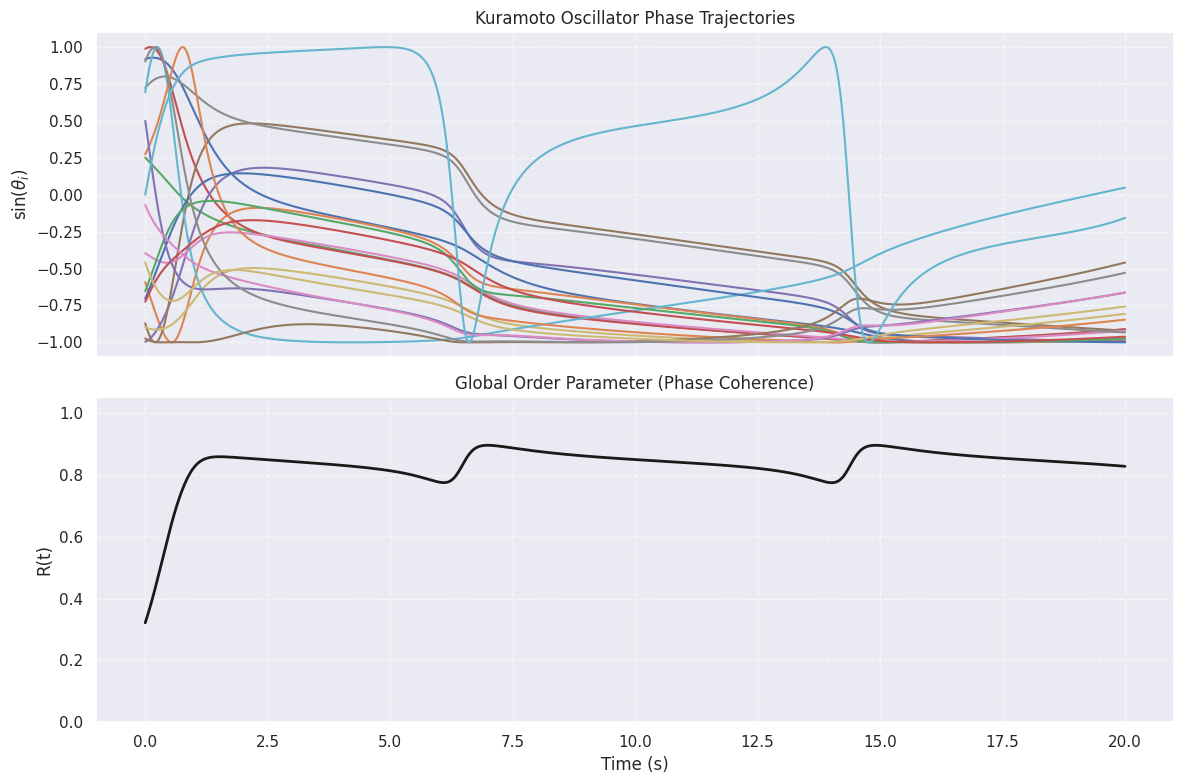

In [22]:
from kuramoto import *
config = KuramotoConfig(num_agents=20, coupling=3, T=20)
key = jax.random.PRNGKey(42)
key, adj_key, state_key = jax.random.split(key, 3)

# 2. Generate system components
adj_matrix = generate_random_adjacency_matrix(adj_key, config)
thetas0, omegas = generate_initial_state(state_key, config)

# 3. Run the simulation
print(f"Running Kuramoto simulation for {config.num_time_steps} steps...")
trajectory = run_kuramoto_simulation(thetas0, omegas, adj_matrix, config)
# Block until the computation is done to measure time accurately if needed
trajectory.block_until_ready()
print("Simulation complete.")

# 4. Analyze the results
R_over_time = phase_coherence(trajectory)
avg_frequencies = mean_frequency(trajectory, omegas, adj_matrix, config)

print("\n--- Analysis Results ---")
print(f"Initial Coherence R(0): {R_over_time[0]:.4f}")
print(f"Final Coherence   R(T): {R_over_time[-1]:.4f}")
print("\nNatural Frequencies (ω):")
print(np.asarray(omegas))
print("\nMean Frequencies over Simulation:")
print(np.asarray(avg_frequencies))

# 5. Plot the results
plot_kuramoto_results(np.asarray(trajectory), np.asarray(R_over_time), config)